### Acceptance ratio and equilibrium time for $\delta = 2$
#### Second plot shows the dependence of  $ \frac{|\sigma^2-<x^2>|}{\sigma^2}$ on number of steps
#### It can be seen that  it fluctuates a lot so the plot was smoothed by averaging the difference over each n step (here n=10000) 

sigma2 = 100.0  , <x^2> =  100.59674761904058
****************************** 
 acceptance ratio =  0.9600866666666666 
****************************** 


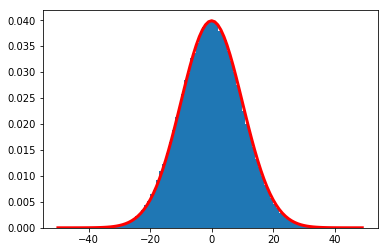

In [123]:
N = 300000

x = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2
n=10000
diffmean=np.zeros(int (N/n))
diff=np.zeros(n)
diffvalue=np.zeros(N)
Naccept=0 
def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew
# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)
###
x[0] = xwalker
xavg2=x[0]**2
diffvalue[0]=abs(xavg2 - sigma2) / sigma2
for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)
    
    diff[i%n -1]=abs(xavg2/(i) - sigma2) / sigma2
    xavg2 += x[i]**2
    diffvalue[i]=abs(xavg2/(i+1) - sigma2) / sigma2
    if (i%n ==0):
        diffmean[int(i/n)]=np.mean(diff)
       
   
    if (x[i]!=x0): # acceptance 
        Naccept+=1
        

xavg2=xavg2 / N
print ('sigma2 =', sigma2, ' , <x^2> = ',xavg2)
binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

# Acceptance ratio:
ratio=Naccept/N
print ('****************************** \n acceptance ratio = ',ratio , '\n****************************** ')


Text(0.5, 0, 'N')

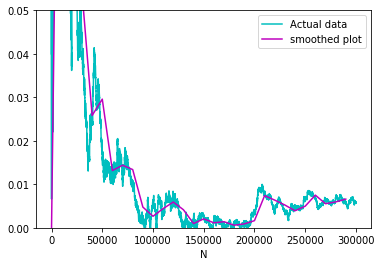

In [124]:
pyplot.plot(np.arange(0,N,1),diffvalue,c='c', label='Actual data')
pyplot.plot(np.arange(0,len(diffmean),1)*n,diffmean,c='m', label='smoothed plot')
pyplot.legend()
pyplot.ylim(0,0.05)
pyplot.xlabel('N')

#### The above plot is the plot of $ \frac{|\sigma^2-<x^2>|}{\sigma^2}$  vs. number of steps 

### Dependence of acceptance ratio  and equilibrium time on $\delta$ 


Text(0.5, 0, 'N')

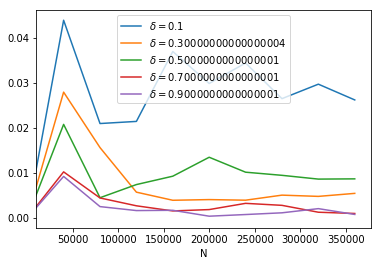

In [133]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 400000
sigma = 1.
sigma2 = sigma**2


x = np.zeros(N)

n=int (N/10)

deltaarray = np.arange(0.1,1,0.2)

xavg2array=np.zeros(len(deltaarray))
Naccept=np.zeros(len(deltaarray))
ratio=np.zeros(len(deltaarray))
equitime = np.zeros(len(deltaarray))
diffvalue=np.zeros(N)
diffmean=np.zeros(int (N/n))
diff=np.zeros(n)


def metropolis(xold,delta):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


for j  in range (0,len(deltaarray)):
   
    condition=0
    delta=deltaarray[j]
    
    xwalker = 20.
    Nwarmup = 500000
    for i in range(Nwarmup):
        xwalker = metropolis(xwalker,delta)
        
    x[0] = xwalker
    xavg2 = x[0]**2 # <x^2>
    diffvalue[0]=abs(xavg2 - sigma2) / sigma2
    for i in range(1,N):
        x0 = x[i-1]
        for k in range(10):
            x0 = metropolis(x0,delta)
        x[i] = metropolis(x0,delta)
        diff[i%n -1]=abs(xavg2/(i) - sigma2) / sigma2
        xavg2 += x[i]**2
        diffvalue[i]=abs(xavg2/(i+1) - sigma2) / sigma2
        if (i%n ==0):
            diffmean[int(i/n)]=np.mean(diff)
        if (i>N/4 and condition ==0):
            if (diffmean[int(i/n)] < 0.01):
                equitime[j]= i - n/2
                condition=1
        if (x[i]!=x0): # acceptance 
            
            Naccept[j]+=1
            
    ratio[j]=Naccept[j]/N 
     
    xavg2array[j]=xavg2/N
    pyplot.plot(np.arange(0,len(diffmean),1)*n,diffmean,label='$\delta=$'+str(delta))
   
            
#pyplot.ylim(0,0)
pyplot.xlim(left=10000)
pyplot.legend()
pyplot.xlabel('N')




#### The above plot is the plot of $ \frac{|\sigma^2-<x^2>|}{\sigma^2}$  vs. number of steps 
#### This plot shows how fast $<x^2> $ reaches $\sigma^2$ for  different values of delta  and it can be seen that larger delta leads to a faster equilibration 

### Equilibrium time 
####  Equilibrium condition : $ \frac{|\sigma^2-<x^2>|}{\sigma^2} < 0.01 $ 


Text(0, 0.5, 'Equilibrium time')

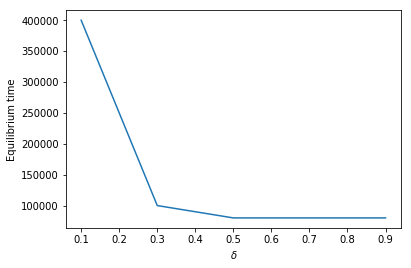

In [135]:
equitime[0]=N
pyplot.plot(deltaarray,equitime)
pyplot.xlabel('$\delta$')
pyplot.ylabel('Equilibrium time')

### Acceptance Ratio

Text(0, 0.5, 'Acceptance ratio')

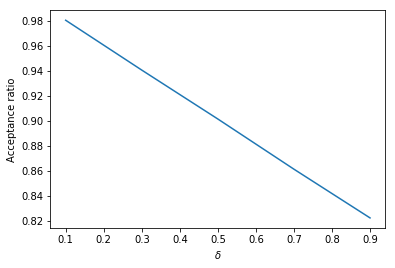

In [136]:
pyplot.plot(deltaarray,ratio)
pyplot.xlabel('$\delta$')
pyplot.ylabel('Acceptance ratio')

